In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/-tesla-daily-stocks-prices/tesla_stocks.csv


# IMPORT PACKAGES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
import tensorflow as tf
from tensorflow import keras

# LOAD DATASET

In [4]:
df = pd.read_csv('/kaggle/input/-tesla-daily-stocks-prices/tesla_stocks.csv', parse_dates = ['Date'])

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2959 entries, 0 to 2958
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2959 non-null   datetime64[ns]
 1   Open       2959 non-null   float64       
 2   High       2959 non-null   float64       
 3   Low        2959 non-null   float64       
 4   Close      2959 non-null   float64       
 5   Adj Close  2959 non-null   float64       
 6   Volume     2959 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 161.9 KB


In [7]:
train_length = round(len(df)*0.7)
lg = len(df)
val_length = lg-train_length

print('Total observations:',lg)
print('Training set:', train_length)
print('Validation set:', val_length)

Total observations: 2959
Training set: 2071
Validation set: 888


In [8]:
train_data = df['Open'][:train_length,]
val_data = df['Open'][train_length:,]

In [9]:
val_data

2071      56.102001
2072      60.712002
2073      59.540001
2074      59.695999
2075      60.000000
           ...     
2954     979.940002
2955    1009.729980
2956    1008.000000
2957    1065.099976
2958    1065.099976
Name: Open, Length: 888, dtype: float64

In [10]:
train_data

0        3.800000
1        5.158000
2        5.000000
3        4.600000
4        4.000000
          ...    
2066    56.287998
2067    57.604000
2068    57.751999
2069    58.007999
2070    59.338001
Name: Open, Length: 2071, dtype: float64

In [11]:
train=train_data.values.reshape(-1,1)
train

array([[ 3.8     ],
       [ 5.158   ],
       [ 5.      ],
       ...,
       [57.751999],
       [58.007999],
       [59.338001]])

In [12]:
# Normalization
# Scale the data between the range [0,1]

scaler = MinMaxScaler()
scaled_trainset = scaler.fit_transform(train)

In [13]:
scaled_trainset

array([[0.00771826],
       [0.02604237],
       [0.0239104 ],
       ...,
       [0.73571719],
       [0.73917152],
       [0.75711784]])

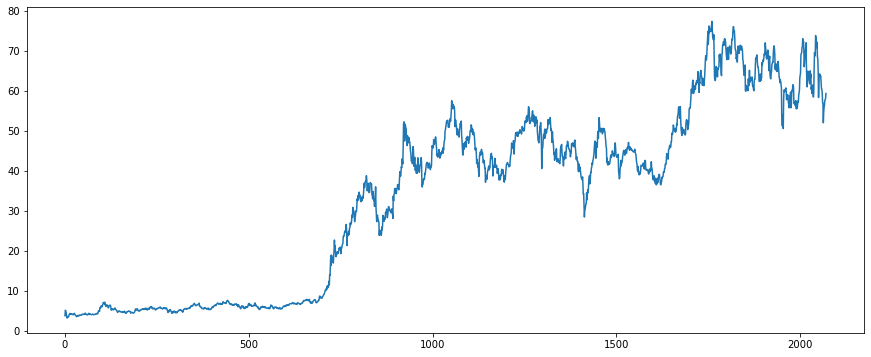

In [14]:
plt.subplots(figsize = (15,6))
plt.plot(train)
plt.show()

For this model the first 50 values will be taken as the x values and 51st value will be used as the y value in the training data

In [15]:
x_train = []
y_train = []
step = 50

for i in range(step, train_length):
    x_train.append(scaled_trainset[i-step:i,0])
    y_train.append(scaled_trainset[i,0])

In [16]:
X_train, y_train = np.array(x_train), np.array(y_train)

In [17]:
print(X_train.shape)
print(y_train.shape)

(2021, 50)
(2021,)


In [18]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
y_train.reshape(y_train.shape[0],1)

array([[0.01311564],
       [0.01244097],
       [0.01281878],
       ...,
       [0.73571719],
       [0.73917152],
       [0.75711784]])

In [19]:
print(X_train.shape)
print(y_train.shape)

(2021, 50, 1)
(2021,)


In [20]:
X_train[0].shape

(50, 1)

In [21]:
y_train[0]

0.013115639446052062

# RNN model

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [23]:
model = Sequential()

model.add(
    SimpleRNN(units = 50,return_sequences= True,input_shape = (X_train.shape[1],1)))

model.add(
    Dropout(0.2))

model.add(
    SimpleRNN(units = 50, return_sequences = True)
             )

model.add(
    Dropout(0.2)
             )

model.add(
    SimpleRNN(units = 50, return_sequences = True)
             )

model.add(
    Dropout(0.2)
             )

model.add(
    SimpleRNN(units = 50)
             )

model.add(
    Dropout(0.2)
             )

model.add(
    Dense(units = 1))

2023-02-11 18:29:36.915134: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [24]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50, 50)            2600      
_________________________________________________________________
dropout (Dropout)            (None, 50, 50)            0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 50, 50)            5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 50, 50)            5050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 50)                5

In [26]:
history = model.fit(X_train, y_train, epochs = 50, batch_size =32)

2023-02-11 18:29:37.500705: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
64/64 [==============================] - 12s 128ms/step - loss: 0.3722 - accuracy: 4.9480e-04
Epoch 2/50
64/64 [==============================] - 7s 115ms/step - loss: 0.1828 - accuracy: 4.9480e-04
Epoch 3/50
64/64 [==============================] - 8s 119ms/step - loss: 0.1102 - accuracy: 4.9480e-04
Epoch 4/50
64/64 [==============================] - 8s 120ms/step - loss: 0.0745 - accuracy: 4.9480e-04
Epoch 5/50
64/64 [==============================] - 8s 126ms/step - loss: 0.0535 - accuracy: 4.9480e-04
Epoch 6/50
64/64 [==============================] - 7s 117ms/step - loss: 0.0411 - accuracy: 4.9480e-04
Epoch 7/50
64/64 [==============================] - 8s 118ms/step - loss: 0.0351 - accuracy: 4.9480e-04
Epoch 8/50
64/64 [==============================] - 8s 117ms/step - loss: 0.0300 - accuracy: 4.9480e-04
Epoch 9/50
64/64 [==============================] - 8s 126ms/step - loss: 0.0248 - accuracy: 4.9480e-04
Epoch 10/50
64/64 [==============================] - 7s 115ms/s

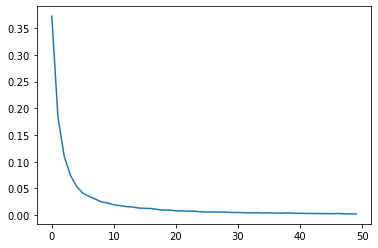

In [27]:
plt.plot(history.history['loss'])

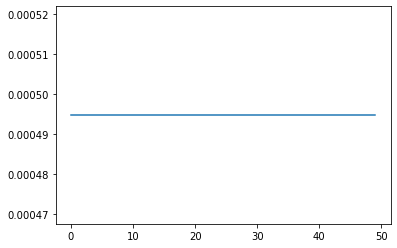

In [28]:
plt.plot(history.history['accuracy'])

In [29]:
y_pred = model.predict(X_train)
y_pred = scaler.inverse_transform(y_pred.reshape(1,-1))

In [30]:
y_pred

array([[ 4.5532675,  4.645937 ,  4.6562686, ..., 56.303886 , 56.89267  ,
        57.695713 ]], dtype=float32)

In [31]:
y_train

array([0.01311564, 0.01244097, 0.01281878, ..., 0.73571719, 0.73917152,
       0.75711784])

In [32]:
y_train = scaler.inverse_transform(y_train.reshape(1,-1))
y_train

array([[ 4.2     ,  4.15    ,  4.178   , ..., 57.751999, 58.007999,
        59.338001]])

In [33]:
y_train.shape
y_train = np.reshape(y_train, (-1,1))

In [34]:
y_pred.shape
y_pred = np.reshape(y_pred,(-1,1))

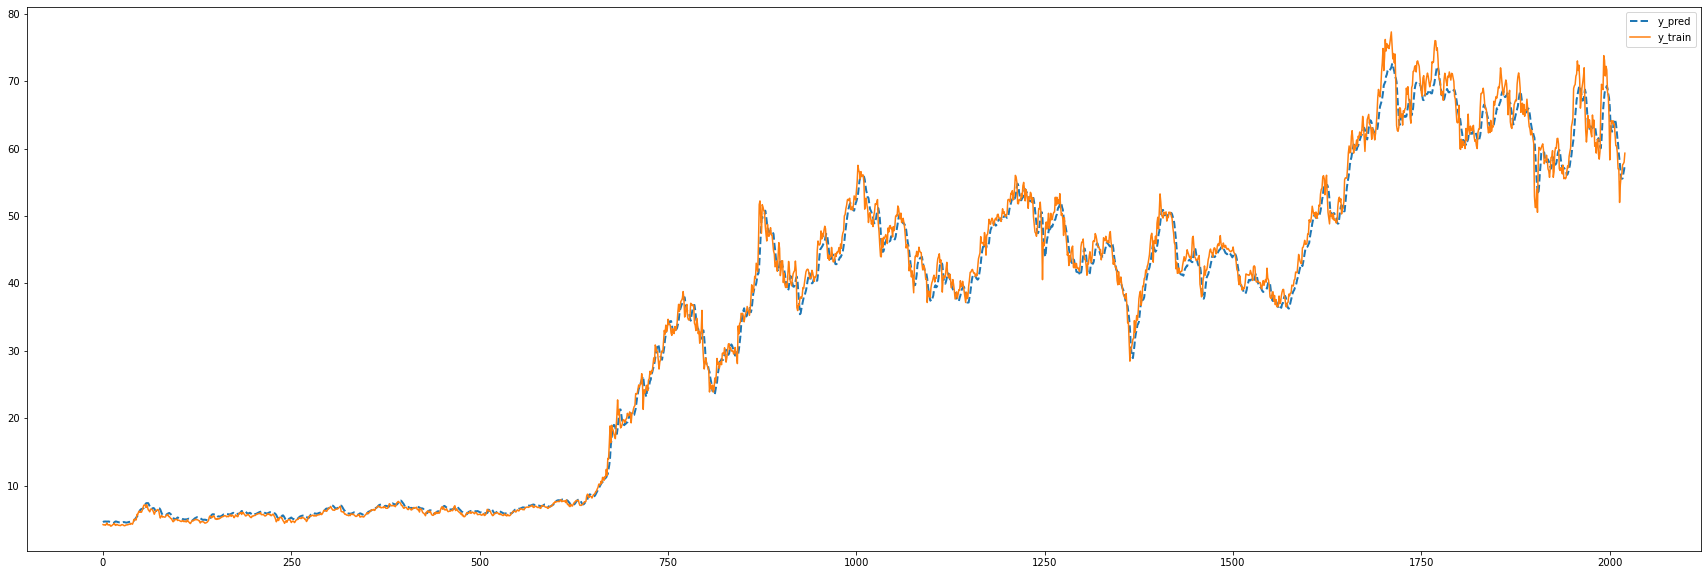

In [35]:
plt.figure(figsize = (30,10))
plt.plot(y_pred, ls = '--', label = 'y_pred', lw = 2)
plt.plot(y_train, label = 'y_train')
plt.legend()
plt.show()

In [36]:
val = val_data.values.reshape(-1,1)
val

array([[  56.102001],
       [  60.712002],
       [  59.540001],
       [  59.695999],
       [  60.      ],
       [  60.382   ],
       [  62.580002],
       [  54.051998],
       [  61.153999],
       [  62.790001],
       [  60.666   ],
       [  58.790001],
       [  54.93    ],
       [  52.903999],
       [  51.049999],
       [  52.922001],
       [  51.506001],
       [  52.200001],
       [  51.812   ],
       [  53.139999],
       [  56.48    ],
       [  53.858002],
       [  53.478001],
       [  52.136002],
       [  52.773998],
       [  60.209999],
       [  63.444   ],
       [  61.650002],
       [  67.494003],
       [  65.678001],
       [  66.508003],
       [  67.652   ],
       [  68.748001],
       [  68.099998],
       [  67.814003],
       [  68.667999],
       [  69.699997],
       [  69.800003],
       [  69.674004],
       [  66.632004],
       [  68.540001],
       [  68.466003],
       [  69.038002],
       [  71.267998],
       [  68.349998],
       [  

In [37]:
scaled_valset = scaler.fit_transform(val)

In [38]:
xval_train = []
yval_train = []
step = 50

for i in range(step, val_length):
    xval_train.append(scaled_valset[i-step:i,0])
    yval_train.append(scaled_valset[i,0])

In [39]:
X_val, y_val = np.array(xval_train), np.array(yval_train)

In [40]:
X_val = np.reshape(X_val, (X_val.shape[0],X_val.shape[1],1))  # reshape to 3D array
y_val = np.reshape(y_val, (-1,1))

In [41]:
y_pred_val = model.predict(X_val)

In [42]:
y_pred_val = scaler.inverse_transform(y_pred_val)

In [43]:
y_val_is = scaler.inverse_transform(y_val)

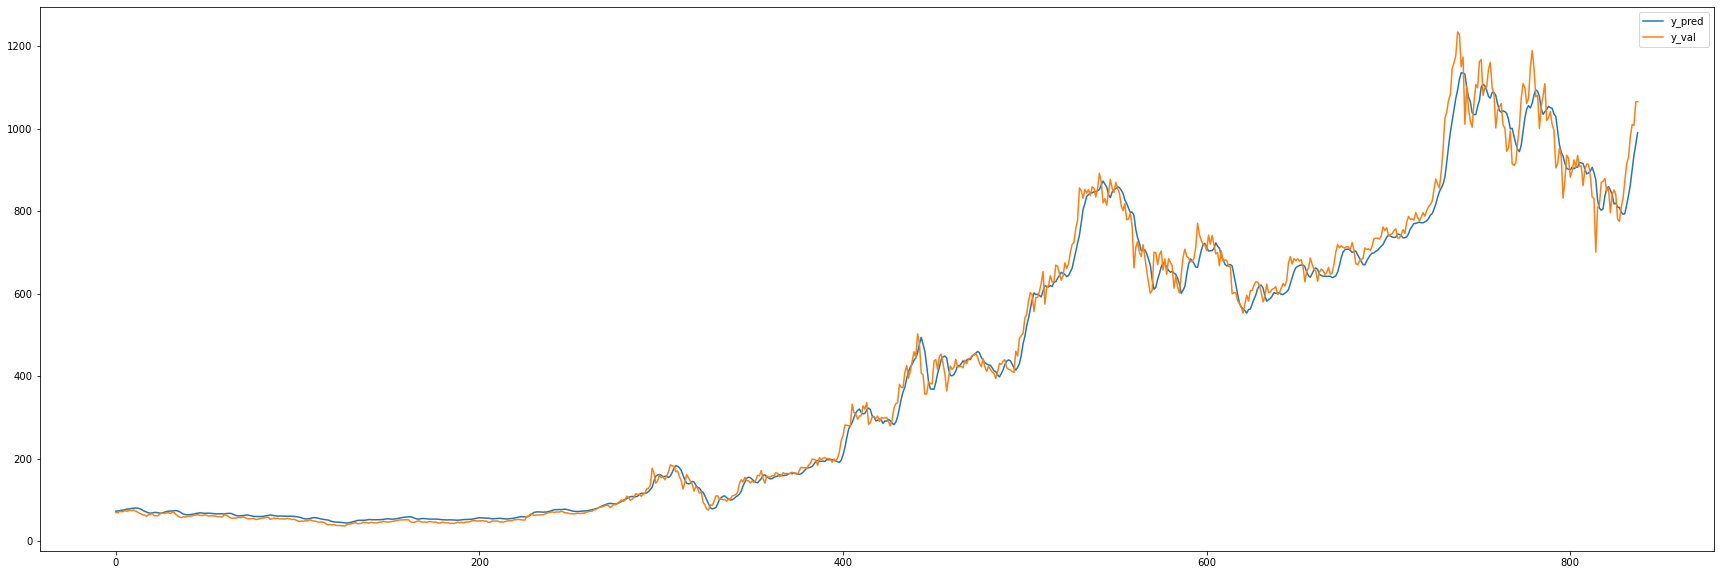

In [44]:
plt.figure(figsize = (30,10))
plt.plot(y_pred_val, label = 'y_pred')
plt.plot(y_val_is, label = 'y_val')
plt.legend()
plt.show()

In [45]:
import tensorflow as tf
import os
from tensorflow.keras.models import load_model

In [46]:
model.save(os.path.join('model', 'SimpleRNN_Forecasting.h5'))
new_model = load_model(os.path.join('model', 'SimpleRNN_Forecasting.h5'))

- The RNN model is saved in variable model.
/kaggle/working/model/SimpleRNN_Forecasting.h5

- Using model we can predict use the model on any data.